CHRONIC KIDNEY DISEASE PREDICTION USING ENSEMBLE TECHNIQUES

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import train_test_split

In [2]:
dataset=pd.read_csv("ckdisease/kidney_disease.csv")


In [3]:
#no of values and columns in the dataset
print(dataset.shape)
dataset.count().sum()

(400, 26)


9391

In [4]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
#dropping ID column
dataset.drop('id', axis = 1, inplace = True)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [7]:
totnull= dataset.isnull().sum().sum()

print("The total number of null values in the dataset is " + str(totnull))
dataset.isnull().sum()

The total number of null values in the dataset is 1009


age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [8]:
for c in dataset:
    print(c)
    print(dataset[str(c)].unique())
    print("---------------------------------------------------------------------------")

age
[48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
---------------------------------------------------------------------------
bp
[ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
---------------------------------------------------------------------------
sg
[1.02  1.01  1.005 1.015   nan 1.025]
---------------------------------------------------------------------------
al
[ 1.  4.  2.  3.  0. nan  5.]
---------------------------------------------------------------------------
su
[ 0.  3.  4.  1. nan  2.  5.]
---------------------------------------------------------------------------
rbc
[nan 'normal' 'abnormal']
---------------------------------------------------------------------------
pc
['normal' 'abnormal' nan]


In [9]:
#Dealing with abnormally values:
dataset=dataset.replace({'\t':np.nan , '\t43':43,'\t6200':6200 , '\t8400':8400, '\t?':np.nan,'ckd\t':"ckd","\tyes":"yes","\tno":"no"," yes":"yes"})

In [10]:
# Select columns with numeric missing values
num_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

# Replace missing values with mean
for col in num_cols:
    dataset[col].fillna(dataset[col].mean(), inplace=True)

In [11]:
# Select columns with categorical missing values
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# Replace missing values using backfill method
for col in cat_cols:
    dataset[col].fillna(method='backfill', inplace=True)


In [12]:
dataset.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for col in cat_cols:
    dataset[col] = label_encoder.fit_transform(dataset[col].astype(str))


In [14]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,4,1,0,1,1,0,0,121.000000,...,44,7800,5.2,1,1,0,0,0,0,0
1,7.0,50.0,4,5,0,1,1,0,0,148.036517,...,38,6000,3.9,0,0,0,0,0,0,0
2,62.0,80.0,1,3,4,1,1,0,0,423.000000,...,31,7500,3.9,0,1,0,1,0,1,0
3,48.0,70.0,0,5,0,1,0,1,0,117.000000,...,32,6700,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1,3,0,1,1,0,0,106.000000,...,35,7300,4.6,0,0,0,0,0,0,0


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics # for accuracy calculation

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, cohen_kappa_score

    

In [16]:
X = dataset.drop('classification', axis=1)
y = dataset['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



In [17]:
#FUNCTION TO CALCULATE EVALUATION METRICS FOR THE MODELS 

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

def calc_metrics(x,y):
    
    # y_true and y_pred are the true and predicted binary labels, respectively
    # The following assumes that 1 represents the positive class and 0 represents the negative class

    # Accuracy
    acc = accuracy_score(x, y)
    print("ACCURACY:",acc)

    # Sensitivity (Recall)
    sens = recall_score(x, y)
    print("SENSITIVITY:",sens)

    # Specificity
    tn, fp, fn, tp = confusion_matrix(x, y).ravel()
    spec = tn / (tn + fp)
    print("SPECIFICITY:",spec)
    # Kappa
    kappa = cohen_kappa_score(x, y)
    print("KAPPA:",kappa)
    # F1-score
    f1 = f1_score(x, y)
    print("F1 SCORE:",f1)
    
    conf_matrix = confusion_matrix(x, y)

    # Plot the confusion matrix
    cm = confusion_matrix(y_test,y_pred)
 
   
    sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['CKD POSITIVE', 'CKD NEGATIVE'],
            yticklabels=['CKD POSITIVE', 'CKD NEGATIVE'])
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Confusion Matrix',fontsize=17)
    plt.show()

Evaluation metrics for Decision tree model 

ACCURACY: 0.975
SENSITIVITY: 0.96
SPECIFICITY: 0.9857142857142858
KAPPA: 0.9484240687679083
F1 SCORE: 0.9696969696969697


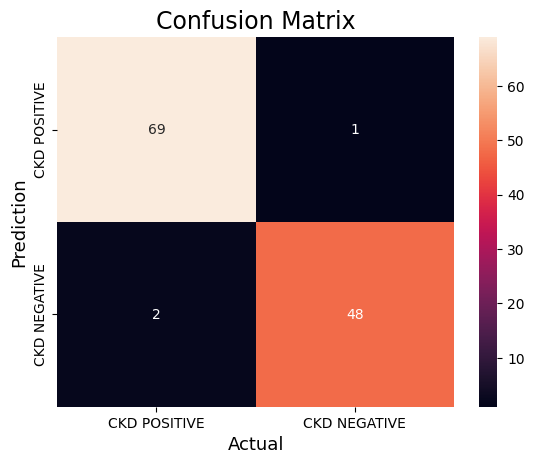

In [31]:
#DECISION TREE MODEL
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train)  
y_pred= classifier.predict(X_test)  
dt_acc=classifier.score(X_train, y_train)
print("Evaluation metrics for Decision tree model \n")
calc_metrics(y_test, y_pred)


Evaluation metrics for KNN Model 

ACCURACY: 0.9416666666666667
SENSITIVITY: 1.0
SPECIFICITY: 0.9
KAPPA: 0.8823529411764706
F1 SCORE: 0.9345794392523363


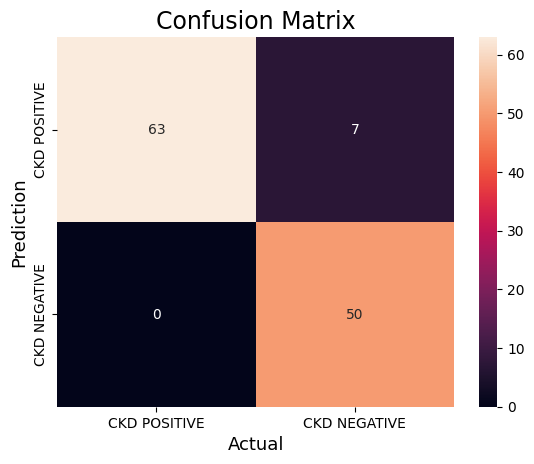

In [19]:
#KNN MODEL

scaler =StandardScaler()

X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred= knn.predict(X_test_scaled) 
print("Evaluation metrics for KNN Model \n")
calc_metrics(y_test, y_pred)


Evaluation metrics for SVM Model 

ACCURACY: 0.9833333333333333
SENSITIVITY: 1.0
SPECIFICITY: 0.9714285714285714
KAPPA: 0.9659090909090909
F1 SCORE: 0.9803921568627451


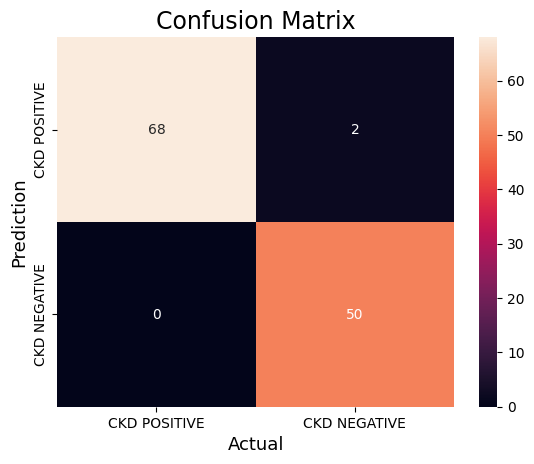

In [20]:
# SVM

from sklearn import svm

clf = svm.SVC(kernel='linear')

# Fit the SVM model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)
print("Evaluation metrics for SVM Model \n")
calc_metrics(y_test, y_pred)



Evaluation metrics for Naive bayes model 

ACCURACY: 0.9666666666666667
SENSITIVITY: 1.0
SPECIFICITY: 0.9428571428571428
KAPPA: 0.9322033898305084
F1 SCORE: 0.9615384615384615


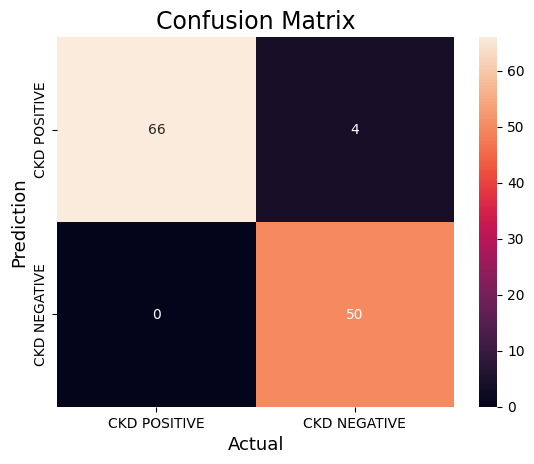

In [21]:
#NAIVE BAYES MODEL
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Evaluation metrics for Naive bayes model \n")
calc_metrics(y_test, y_pred)


Evaluation metrics for Logistic regression model 

ACCURACY: 0.9083333333333333
SENSITIVITY: 0.92
SPECIFICITY: 0.9
KAPPA: 0.8130311614730878
F1 SCORE: 0.8932038834951457


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


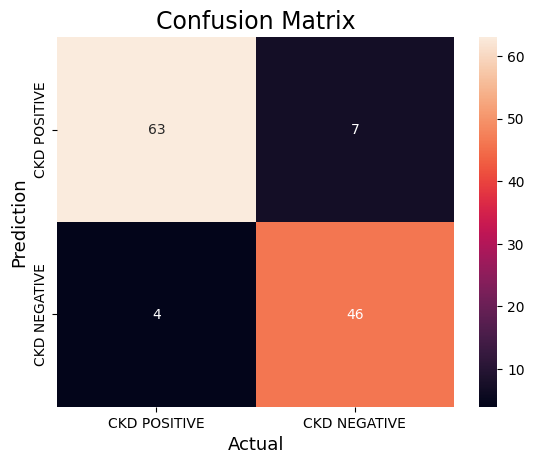

In [22]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
  
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Evaluation metrics for Logistic regression model \n")
calc_metrics(y_test, y_pred)


Accuracy of base learners under bagging ensemble method


Evaluation metrics for KNeighborsClassifier() : 

ACCURACY: 0.9416666666666667
SENSITIVITY: 1.0
SPECIFICITY: 0.9
KAPPA: 0.8823529411764706
F1 SCORE: 0.9345794392523363


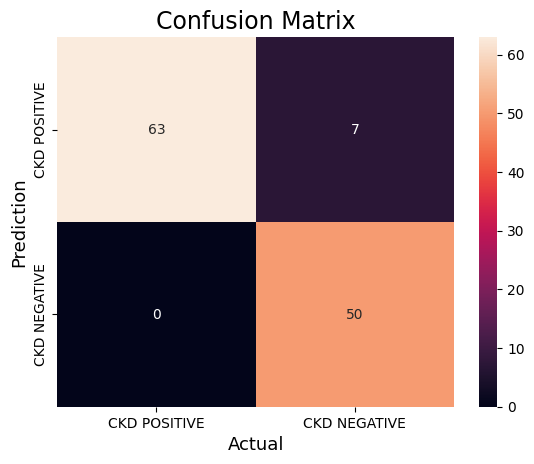

Evaluation metrics for GaussianNB() : 

ACCURACY: 0.9583333333333334
SENSITIVITY: 1.0
SPECIFICITY: 0.9285714285714286
KAPPA: 0.9154929577464789
F1 SCORE: 0.9523809523809523


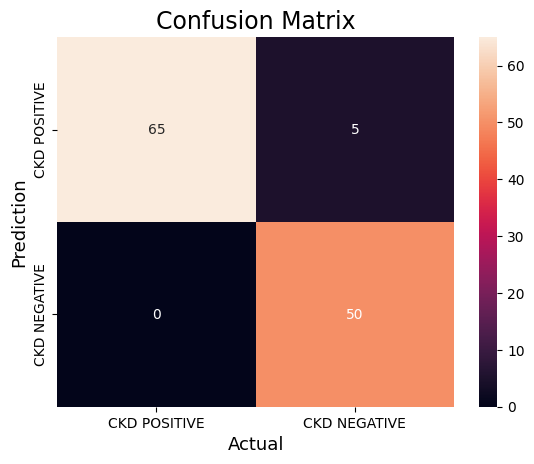

Evaluation metrics for DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0) : 

ACCURACY: 0.9083333333333333
SENSITIVITY: 0.96
SPECIFICITY: 0.8714285714285714
KAPPA: 0.8151260504201681
F1 SCORE: 0.8971962616822429


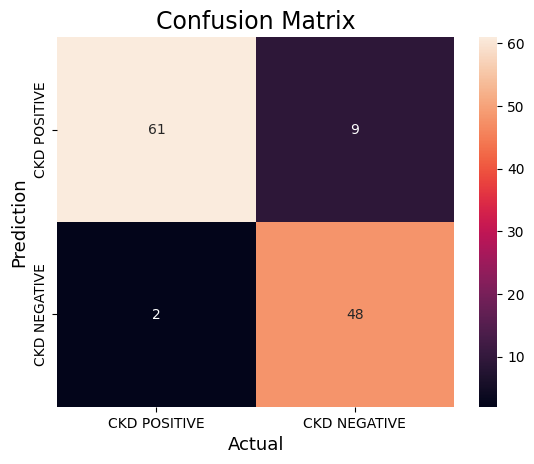

Evaluation metrics for SVC() : 

ACCURACY: 0.9916666666666667
SENSITIVITY: 1.0
SPECIFICITY: 0.9857142857142858
KAPPA: 0.9829059829059829
F1 SCORE: 0.99009900990099


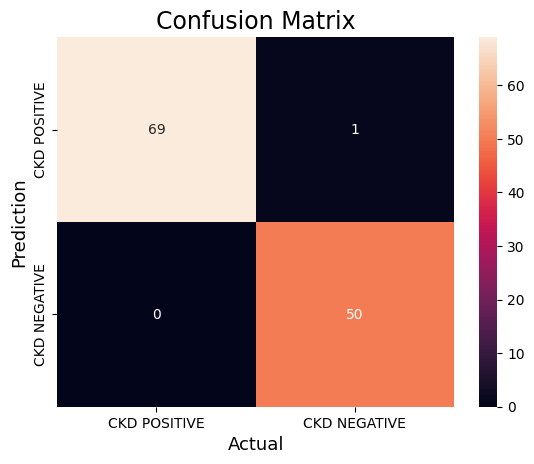

Evaluation metrics for LogisticRegression() : 

ACCURACY: 0.9833333333333333
SENSITIVITY: 1.0
SPECIFICITY: 0.9714285714285714
KAPPA: 0.9659090909090909
F1 SCORE: 0.9803921568627451


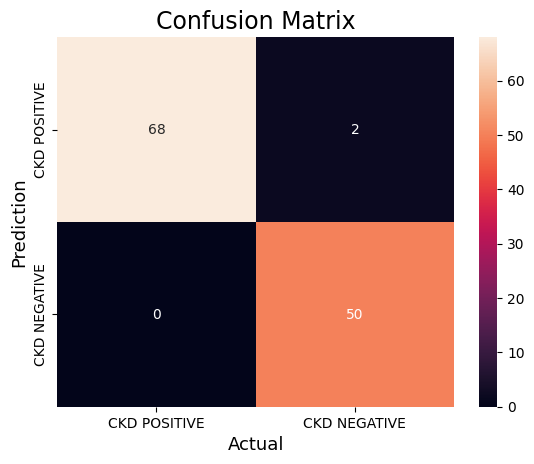

In [33]:
#BAGGING ENSEMBLE
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
print("Accuracy of base learners under bagging ensemble method")
print("\n")
scaler =StandardScaler()

X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()
nb = GaussianNB()
dt = DecisionTreeClassifier(criterion='entropy', random_state=0,max_depth=1)  
svm = SVC()
lr = LogisticRegression()



base_learners=[knn,nb,dt,svm,lr]

for i in base_learners:
    
    bagging = BaggingClassifier(estimator=i, n_estimators=1500, random_state=42)
    bagging.fit(X_train_scaled, y_train)
    y_pred = bagging.predict(X_test_scaled)

    print("Evaluation metrics for" ,i,": \n")
    calc_metrics(y_test, y_pred)


Evaluation metrics for Voting classifier: 

ACCURACY: 0.9916666666666667
SENSITIVITY: 1.0
SPECIFICITY: 0.9857142857142858
KAPPA: 0.9829059829059829
F1 SCORE: 0.99009900990099


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


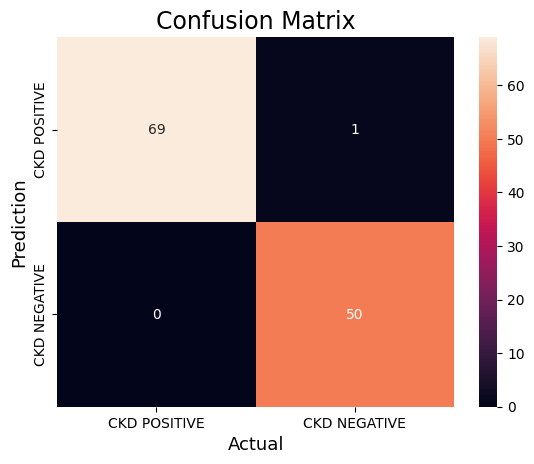

In [24]:
#VOTING CLASSIFIER

from sklearn.ensemble import VotingClassifier

scaler =StandardScaler()

X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()
nb = GaussianNB()
dt = DecisionTreeClassifier()
svm = SVC()
lr = LogisticRegression()

base_learners=[knn,nb,dt,svm,lr]


Hard = VotingClassifier(estimators=[('KNN', knn), ('Naive bayes', nb), ('Decision tree', dt),('SVM',svm),('Logistic regression',lr)], voting='hard')

Hard.fit(X_train, y_train)
y_pred = Hard.predict(X_test)


print("Evaluation metrics for Voting classifier: \n")
calc_metrics(y_test, y_pred)




Accuracy of base learners under randomsubspace ensemble method


KNeighborsClassifier(n_neighbors=3)
Evaluation metrics for KNeighborsClassifier(n_neighbors=3) : 

ACCURACY: 1.0
SENSITIVITY: 1.0
SPECIFICITY: 1.0
KAPPA: 1.0
F1 SCORE: 1.0


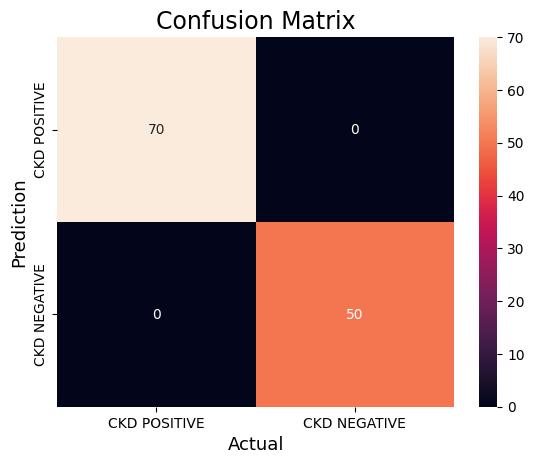

GaussianNB()
Evaluation metrics for GaussianNB() : 

ACCURACY: 0.9333333333333333
SENSITIVITY: 1.0
SPECIFICITY: 0.8857142857142857
KAPPA: 0.8659217877094972
F1 SCORE: 0.9259259259259259


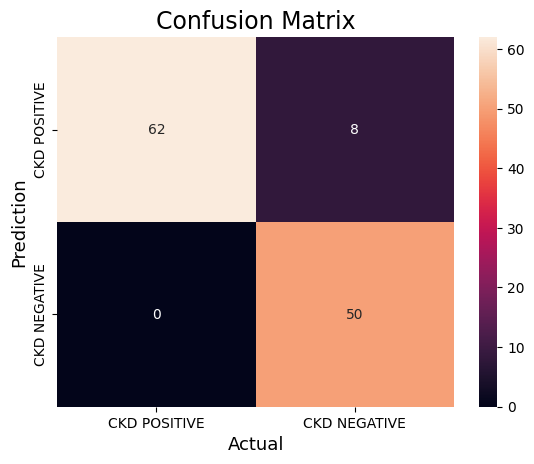

DecisionTreeClassifier()
Evaluation metrics for DecisionTreeClassifier() : 

ACCURACY: 0.9833333333333333
SENSITIVITY: 0.96
SPECIFICITY: 1.0
KAPPA: 0.9655172413793104
F1 SCORE: 0.9795918367346939


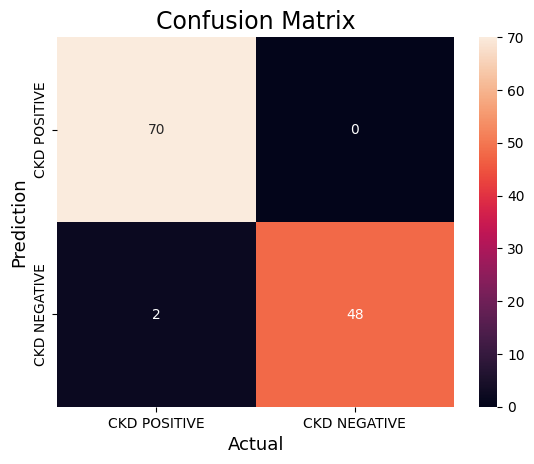

SVC()
Evaluation metrics for SVC() : 

ACCURACY: 0.9916666666666667
SENSITIVITY: 1.0
SPECIFICITY: 0.9857142857142858
KAPPA: 0.9829059829059829
F1 SCORE: 0.99009900990099


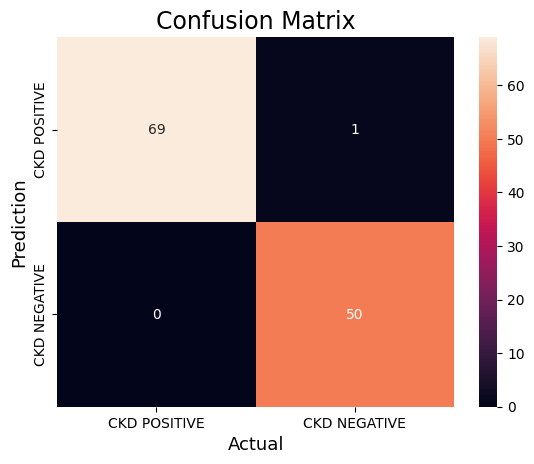

LogisticRegression()
Evaluation metrics for LogisticRegression() : 

ACCURACY: 0.975
SENSITIVITY: 1.0
SPECIFICITY: 0.9571428571428572
KAPPA: 0.9490084985835694
F1 SCORE: 0.970873786407767


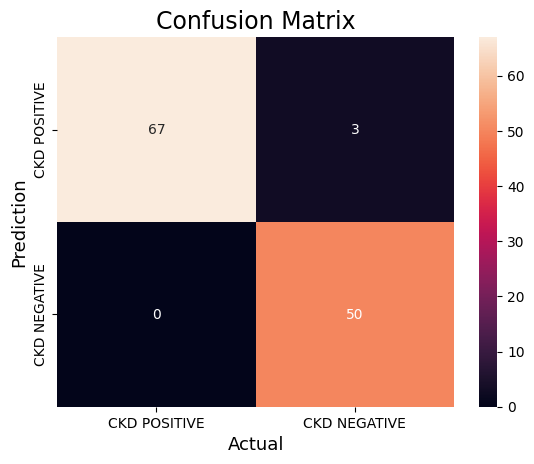

In [70]:
#Randomsubspace ensemble 


print("Accuracy of base learners under randomsubspace ensemble method")
print("\n")
knn = KNeighborsClassifier(n_neighbors=3)
nb = GaussianNB()
dt = DecisionTreeClassifier()
svm = SVC()
lr = LogisticRegression()

base_learners=[knn,nb,dt,svm,lr]

for i in base_learners:
    print(str(i))
    #n_features = int(np.sqrt(X.shape[1])) # Number of randomly selected features
    rs = BaggingClassifier(estimator=i, n_estimators=10, max_samples=0.5, max_features=10)
    rs.fit(X_train_scaled, y_train)
    y_pred = rs.predict(X_test_scaled)

    
    
    print("Evaluation metrics for" ,i,": \n")
    calc_metrics(y_test, y_pred)


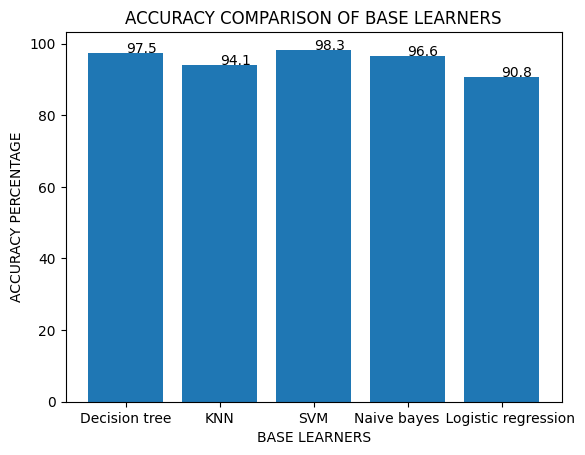

In [26]:
#BAR GRAPH FOR COMPARISON OF INDIVIDUAL BASE LEARNERS
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
 

x = np.array(["Decision tree", "KNN", "SVM", "Naive bayes     ","    Logistic regression"])
y = np.array([97.5,94.1,98.3,96.6,90.8])

plt.bar(x,y)
addlabels(x, y)

plt.xlabel("BASE LEARNERS")
plt.ylabel("ACCURACY PERCENTAGE")
plt.title("ACCURACY COMPARISON OF BASE LEARNERS")
plt.show()

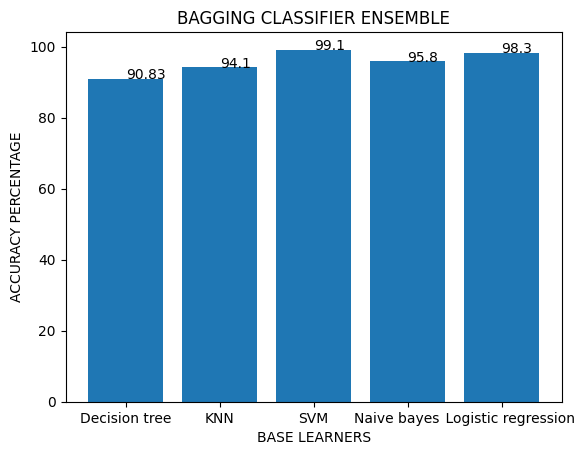

In [30]:
#BAR GRAPH FOR COMPARISON OF BAGGING CLASSIFIER
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
 

x = np.array(["Decision tree", "KNN", "SVM", "Naive bayes     ","    Logistic regression"])
y = np.array([90.83,94.1,99.1,95.8,98.3])

plt.bar(x,y)
addlabels(x, y)

plt.xlabel("BASE LEARNERS")
plt.ylabel("ACCURACY PERCENTAGE")
plt.title("BAGGING CLASSIFIER ENSEMBLE")
plt.show()

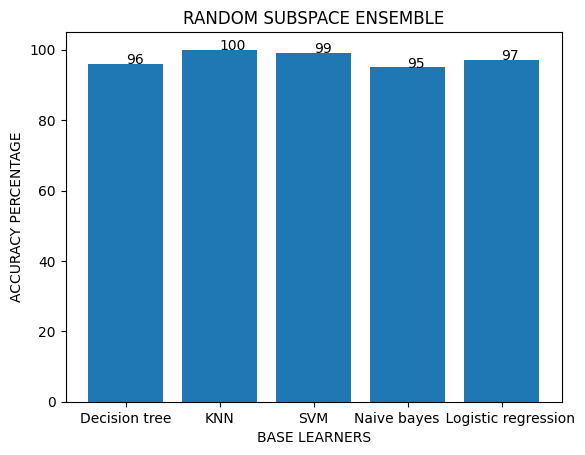

In [29]:
#BAR GRAPH FOR COMPARISON OF RANDOM SUBSPACE ENSEMBLE
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
 

x = np.array(["Decision tree", "KNN", "SVM", "Naive bayes     ","    Logistic regression"])
y = np.array([96,100,99,95,97])

plt.bar(x,y)
addlabels(x, y)

plt.xlabel("BASE LEARNERS")
plt.ylabel("ACCURACY PERCENTAGE")
plt.title("RANDOM SUBSPACE ENSEMBLE")
plt.show()